In [1]:
import sys
sys.path.insert(0, "../")

import numpy as np
import matplotlib.pyplot as plt
from time import time

from sklearn.datasets import load_iris
from mcfa import (mcfa, mpl_utils, utils)

%matplotlib inline

In [2]:
seed = 42 # for reproducibility

N = 1000
D = 10
J = 3
K = 5

X, truths = utils.simulate_data(N=N, D=D, J=J, K=K, seed=seed, full_output=True)

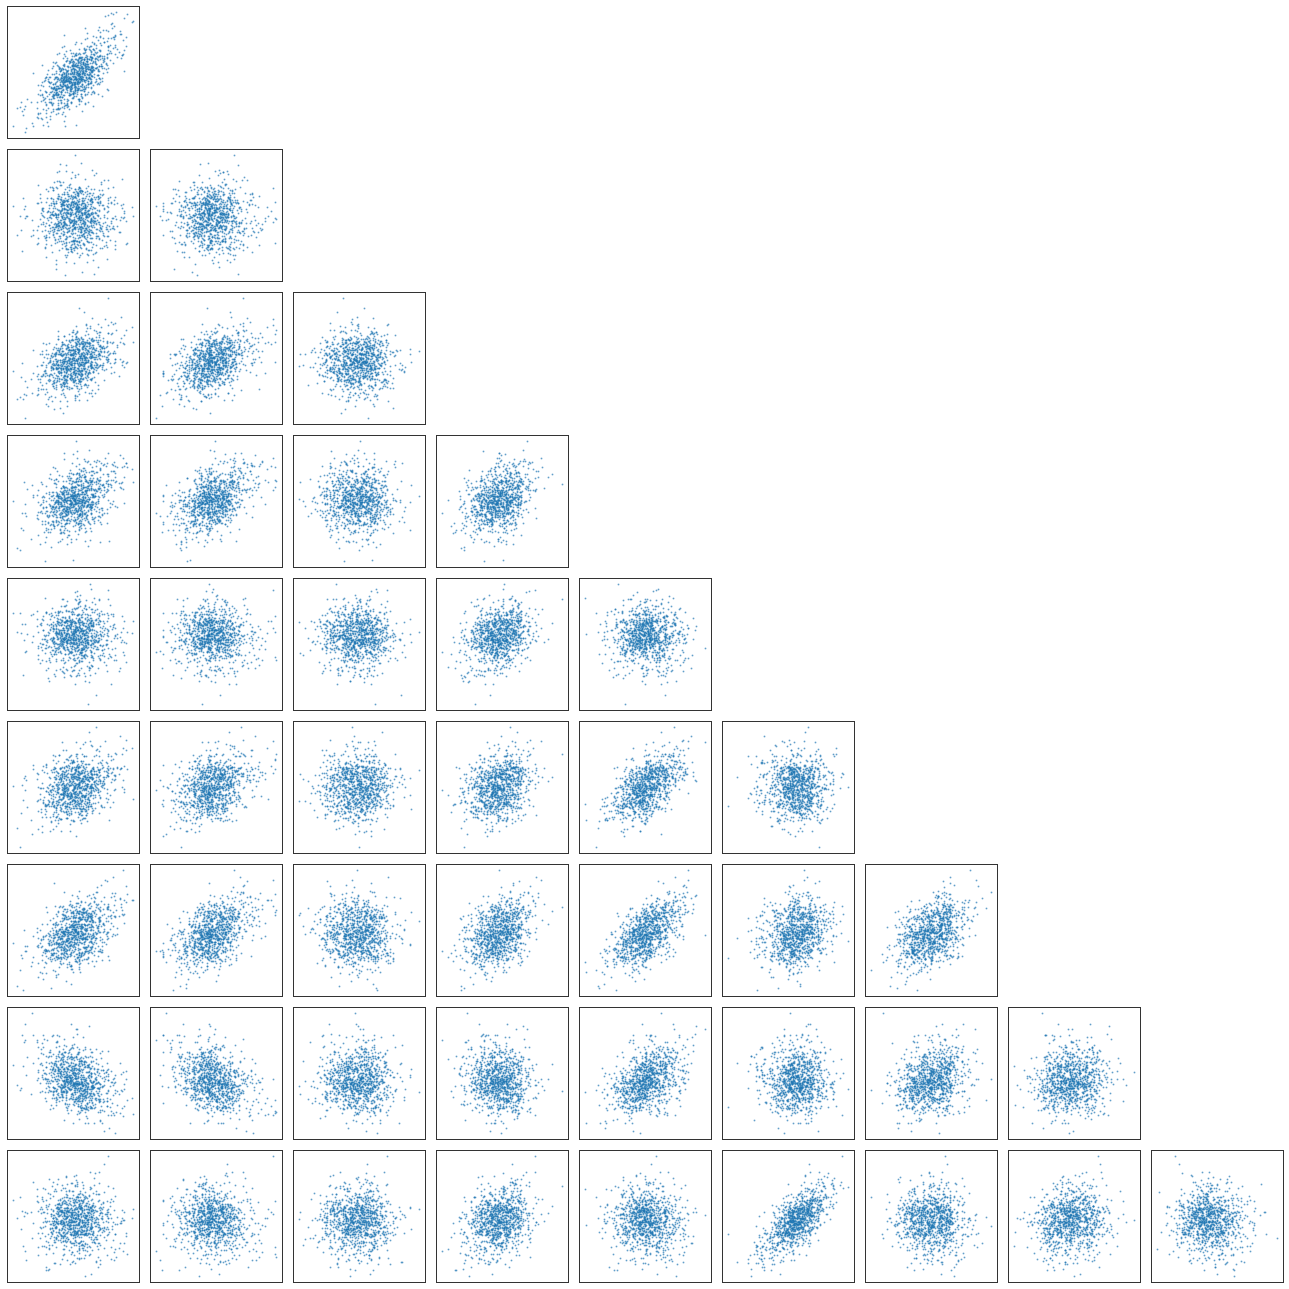

In [3]:
fig = mpl_utils.corner_scatter(X)

In [4]:
model = mcfa.MCFA(n_components=5, n_latent_factors=3)

In [5]:
%timeit model.fit(X)

2.52 s ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
seed = 42 # for reproducibility

D = 10
J = 3
K = 5

model = mcfa.MCFA(n_components=K, n_latent_factors=J,
                  n_init=1, n_random_init=0)

lower, upper = 3, 4
count = 10

Ns = np.logspace(lower, upper, count).astype(int)
costs = np.zeros(Ns.shape, dtype=float)

for i, N in enumerate(Ns):
    ta = time()
    X, truths = utils.simulate_data(N=N, D=D, J=J, K=K, seed=seed, full_output=True)
    
    t_simulate = time() - ta
    
    ta = time()
    model.fit(X)
    t_fit = time() - ta
    
    print("{}: {:.0f} s to generate; {:.0f} s to fit; ll = {:.0f}".format(
         N, t_simulate, t_fit, model.log_likelihood_))
    
    costs[i] = t_fit

1000: 0 s to generate; 0 s to fit; ll = -13917
1291: 0 s to generate; 1 s to fit; ll = -18171
1668: 0 s to generate; 2 s to fit; ll = -23644
2154: 0 s to generate; 4 s to fit; ll = -29612
2782: 0 s to generate; 7 s to fit; ll = -37826
3593: 0 s to generate; 10 s to fit; ll = -50377
4641: 0 s to generate; 19 s to fit; ll = -65209
5994: 0 s to generate; 23 s to fit; ll = -83725
7742: 0 s to generate; 74 s to fit; ll = -96320
10000: 0 s to generate; 92 s to fit; ll = -144431


In [31]:
# Go harder
Ns = np.hstack([Ns, np.logspace(4, 5, count).astype(int)])
costs = np.hstack([costs, np.zeros(Ns.size - costs.size)])


In [34]:
print(Ns)
print(costs)
print(Ns.size, costs.size)

[  1000   1291   1668   2154   2782   3593   4641   5994   7742  10000
  12915  16681  21544  27825  35938  46415  59948  77426 100000]
[ 0.4262023   0.60073781  1.82339978  4.19413662  6.61623216  9.5441196
 18.7568202  23.36144519 74.28914881 92.34293199  0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
19 19


In [35]:
for i, N in enumerate(Ns):
    if costs[i] > 0: continue
        
    ta = time()
    X, truths = utils.simulate_data(N=N, D=D, J=J, K=K, seed=seed, full_output=True)
    
    t_simulate = time() - ta
    
    ta = time()
    model.fit(X)
    t_fit = time() - ta
    
    print("{}: {:.0f} s to generate; {:.0f} s to fit; ll = {:.0f}".format(
         N, t_simulate, t_fit, model.log_likelihood_))
    
    costs[i] = t_fit

12915: 0 s to generate; 116 s to fit; ll = -178450
16681: 0 s to generate; 641 s to fit; ll = -246936
21544: 0 s to generate; 824 s to fit; ll = -312287


KeyboardInterrupt: 

[]

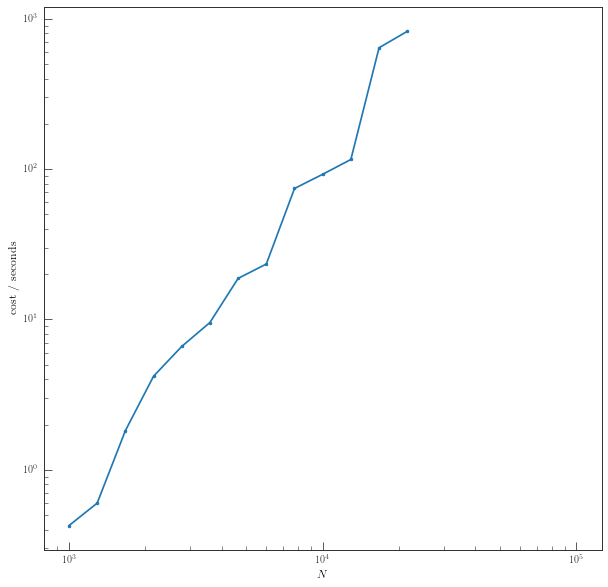

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(Ns, costs)
ax.semilogy()
ax.set_xlabel(r"$N$")
ax.set_ylabel(r"\textrm{cost / seconds}")
ax.semilogx()

In [ ]:
# 10,000 data points with 10 dimensions costs about two minutes
